In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %ls
import scipy as sp
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import vibrationtesting as vt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
M = np.array([[4, 0, 0],
            [0, 4, 0],
                   [0, 0, 4]])
Cso = np.array([[.1,0,0],
               [0,0,0],
               [0,0,0]])

K = np.array([[8, -4, 0],
                   [-4, 8, -4],
                   [0, -4, 4]])

In [9]:
Mred, Kred, T, master, truncated_dofs = vt.guyan(M, K, fraction = .7)

In [10]:
Kred

array([[ 6., -4.],
       [-4.,  4.]])

In [11]:
Mred

array([[ 5.,  0.],
       [ 0.,  4.]])

In [36]:
omega, zeta, Psi = vt.sos_modal(M, K, Cso)

Damping matrix cannot be completely diagonalized.
Off diagonal error of 225%.


In [13]:
Bt = np.array([[1],[0],[0]])
Ca = np.array([[1,0,0]])
Cd = Cv = np.zeros_like(Ca)

In [14]:
A, B, C, D = vt.so2ss(M, Cso, K, Bt, Cd, Cv, Ca)

In [39]:
vt.damp(A)

............... Eigenvalue ...........     Damping     Frequency
--------[re]---------[im]--------[abs]----------------------[Hz]
      -0.004        +1.802      1.802                         0.002         0.287
      -0.004        -1.802      1.802                         0.002         0.287
      -0.007        +1.247      1.247                         0.005         0.198
      -0.007        -1.247      1.247                         0.005         0.198
      -0.001        +0.445      0.445                         0.003         0.071
      -0.001        -0.445      0.445                         0.003         0.071


In [15]:
_,_,_,_, eigenvalues, eigenvectors = vt.ss_modal(A, B, C, D)

In [17]:
eigenvectors.shape

(6, 6)

In [91]:
modes = eigenvectors[0:3,0::2]
modes

array([[-0.00604609+0.28670057j,  0.00251064+0.46107979j,
        -0.29964299+0.00209841j],
       [-0.00086643-0.35763496j, -0.00544907+0.20516886j,
        -0.53994780+0.00080588j],
       [ 0.00150018+0.15917262j, -0.00146149-0.36967363j, -0.67330661+0.j        ]])

In [40]:
np.abs(modes)

array([[ 0.28676431,  0.46108663,  0.29965033],
       [ 0.35763601,  0.20524121,  0.5399484 ],
       [ 0.15917969,  0.36967652,  0.67330661]])

In [94]:
vt.real_modes(modes)

Need to approximately realify modes first for this method to work


array([[ 0.28676431,  0.46108663,  0.29965033],
       [-0.35760856,  0.20508651,  0.53992704],
       [ 0.15918577, -0.36961012,  0.67332517]])

In [103]:
vt.real_modes(modes)

(array([[-0.01605398, -0.01034763, -0.00133162],
       [ 0.00899601,  0.00396415, -0.00289459],
       [ 0.001521  ,  0.00380281,  0.0057284 ]]), array([], dtype=float64), 3, array([ 0.91358924,  0.62557347,  0.48516099]))
Need to approximately realify modes first for this method to work


array([[ 0.28676431,  0.46108663,  0.29965033],
       [-0.35760856,  0.20508651,  0.53992704],
       [ 0.15918577, -0.36961012,  0.67332517]])

In [106]:
np.sign(modes)

array([[-1.+0.j,  1.+0.j, -1.+0.j],
       [-1.+0.j, -1.+0.j, -1.+0.j],
       [ 1.+0.j, -1.+0.j, -1.+0.j]])

In [108]:
modes2 = np.sign(modes)*modes

In [109]:
modes2@np.diag(np.exp(np.angle(modes2[0,:])*-1j))

array([[ 0.28676431 -2.34187669e-17j,  0.46108663 -9.54097912e-18j,
         0.29965033 +0.00000000e+00j],
       [-0.35753719 +8.40655390e-03j, -0.20513615 -6.56614297e-03j,
         0.53994020 +2.97531465e-03j],
       [-0.15910561 +4.85581278e-03j,  0.36967611 +5.51426224e-04j,
         0.67329010 +4.71506774e-03j]])

In [110]:
modes2[:,0]

array([ 0.00604609-0.28670057j,  0.00086643+0.35763496j,
        0.00150018+0.15917262j])

In [73]:
Psi_real = np.imag(modes)
Psi_im = np.real(modes)
    #return Psi_real+rsolve(Psi_real.T@Psi_real,Psi_im)@Psi_real.T@Psi_im

In [74]:
Psi_real

array([[ 0.28670057,  0.46107979],
       [-0.35763496,  0.20516886],
       [ 0.15917262, -0.36967363]])

In [75]:
Psi_im

array([[-0.00604609,  0.00251064],
       [-0.00086643, -0.00544907],
       [ 0.00150018, -0.00146149]])

In [77]:
Psi_real+vt.rsolve(Psi_real.T@Psi_real,Psi_im)@Psi_real.T@Psi_im

array([[ 0.28670841,  0.46102096],
       [-0.35758158,  0.20515182],
       [ 0.15917821, -0.36966028]])

In [84]:
Psi_real+Psi_im@la.inv(Psi_real.T@Psi_real)@Psi_real.T@Psi_im

array([[ 0.28670841,  0.46102096],
       [-0.35758158,  0.20515182],
       [ 0.15917821, -0.36966028]])

In [81]:
vt.real_modes(modes)

array([[ 24.76622255, -34.3631277 ],
       [ 16.1899377 ,  30.36594179],
       [-24.00329442,  -9.06096425]])

In [83]:
Psi

array([[-0.16399264,  0.36848811, -0.29550452],
       [-0.29550452,  0.16399264,  0.36848811],
       [-0.36848811, -0.29550452, -0.16399264]])

In [80]:
Psi_real+Psi_im@la.solve(Psi_real,Psi_im)

ValueError: Input a needs to be a square matrix.

In [61]:
Psi

array([[-0.16399264,  0.36848811, -0.29550452],
       [-0.29550452,  0.16399264,  0.36848811],
       [-0.36848811, -0.29550452, -0.16399264]])

In [112]:
values, vectors = la.eig(A)
values

array([-0.00436530+1.80186237j, -0.00436530-1.80186237j,
       -0.00679001+1.24698803j, -0.00679001-1.24698803j,
       -0.00134469+0.44504754j, -0.00134469-0.44504754j])

In [113]:
np.abs(values)

array([ 1.80186766,  1.80186766,  1.24700652,  1.24700652,  0.44504957,
        0.44504957])

In [116]:
idxp = abs(values).argsort()
idxp

array([4, 5, 2, 3, 0, 1])

In [34]:
A_modal = la.solve(vectors,A)@vectors
B_modal = la.solve(vectors,B)
C_modal = C@vectors
D_modal = D
np.round(A_modal, decimals = 10)

array([[-0.00436530+1.80186237j,  0.00000000+0.j        ,
         0.00000000+0.j        ,  0.00000000+0.j        ,
        -0.00000000-0.j        , -0.00000000-0.j        ],
       [ 0.00000000-0.j        , -0.00436530-1.80186237j,
         0.00000000-0.j        ,  0.00000000-0.j        ,
        -0.00000000+0.j        , -0.00000000+0.j        ],
       [-0.00000000+0.j        ,  0.00000000+0.j        ,
        -0.00679001+1.24698803j, -0.00000000-0.j        ,
         0.00000000-0.j        ,  0.00000000-0.j        ],
       [ 0.00000000-0.j        , -0.00000000-0.j        ,
        -0.00000000+0.j        , -0.00679001-1.24698803j,
         0.00000000+0.j        ,  0.00000000+0.j        ],
       [ 0.00000000-0.j        ,  0.00000000+0.j        ,
        -0.00000000-0.j        ,  0.00000000-0.j        ,
        -0.00134469+0.44504754j, -0.00000000-0.j        ],
       [ 0.00000000-0.j        ,  0.00000000+0.j        ,
         0.00000000+0.j        , -0.00000000+0.j        ,
        -

In [28]:
la.inv(vectors)@A@vectors

array([[ -4.36530472e-03 +1.80186237e+00j,
          3.07913417e-17 +2.22044605e-16j,
          2.85857698e-17 +3.52053667e-16j,
          1.90854754e-16 +6.34743352e-16j,
         -1.16380448e-15 -1.58691002e-17j,
         -8.80237450e-16 -6.23939105e-17j],
       [  2.86229374e-17 -3.33066907e-16j,
         -4.36530472e-03 -1.80186237e+00j,
          1.94652036e-16 -6.09137756e-16j,
          2.89899478e-17 -3.26479256e-16j,
         -8.63601771e-16 +6.31169761e-17j,
         -1.18043702e-15 +1.63307549e-17j],
       [ -5.56085856e-17 +4.83611880e-16j,
          1.05330104e-16 +2.14595436e-16j,
         -6.79000763e-03 +1.24698803e+00j,
         -2.48499138e-16 -1.11022302e-15j,
          4.51207073e-16 -1.38651141e-17j,
          7.80470596e-17 -1.11788152e-16j],
       [  1.03391168e-16 -3.29407220e-16j,
         -5.34275535e-17 -4.24311247e-16j,
         -2.39825521e-16 +9.99200722e-16j,
         -6.79000763e-03 -1.24698803e+00j,
          1.80557131e-16 +1.11171059e-16j,
        

In [17]:
help(vt.so2ss)

Help on function so2ss in module vibrationtesting.system:

so2ss(M, C, K, Bt, Cd, Cv, Ca)
    Convert second order system to state space.
    
    Given second order linear matrix equation of the form
    :math:`M\\ddot{x} + C \\dot{x} + K x= \\tilde{B} u`
    and
    :math:`y = C_d x + C_v \\dot{x} + C_a\\ddot{x}`
    returns the state space form equations
    :math:`\\dot{z} = A z + B u`,
    :math:`y = C z + D u`
    
    Parameters
    ----------
    M, C, K, Bt, Cd, Cv, Cd : float arrays
        Mass , damping, stiffness, input, displacement sensor, velocimeter,
        and accelerometer matrices
    
    Returns
    -------
    A, B, C, D : float arrays
        State matrices
    
    Examples
    --------
    >>> import vibrationtesting as vt
    >>> M = np.array([[2, 1],
    ...               [1, 3]])
    >>> K = np.array([[2, -1],
    ...               [-1, 3]])
    >>> C = np.array([[0.01, 0.001],
    ...               [0.001, 0.01]])
    >>> Bt = np.array([[0], [1]])
    >>>

In [16]:
help(la.eig)

Help on function eig in module scipy.linalg.decomp:

eig(a, b=None, left=False, right=True, overwrite_a=False, overwrite_b=False, check_finite=True, homogeneous_eigvals=False)
    Solve an ordinary or generalized eigenvalue problem of a square matrix.
    
    Find eigenvalues w and right or left eigenvectors of a general matrix::
    
        a   vr[:,i] = w[i]        b   vr[:,i]
        a.H vl[:,i] = w[i].conj() b.H vl[:,i]
    
    where ``.H`` is the Hermitian conjugation.
    
    Parameters
    ----------
    a : (M, M) array_like
        A complex or real matrix whose eigenvalues and eigenvectors
        will be computed.
    b : (M, M) array_like, optional
        Right-hand side matrix in a generalized eigenvalue problem.
        Default is None, identity matrix is assumed.
    left : bool, optional
        Whether to calculate and return left eigenvectors.  Default is False.
    right : bool, optional
        Whether to calculate and return right eigenvectors.  Default is Tru

In [15]:
.604/.2689

2.2461881740423952

In [16]:
omega

array([ 0.44504187,  1.2469796 ,  1.80193774])

In [18]:
omega_red, _, Psi_red = vt.sos_modal(Mred, Kred)
omega_red


array([ 0.4472136 ,  1.41421356])

In [33]:
master

array([2])

In [32]:
truncated_dofs

[0, 1]

list((2,3))

In [12]:
np.array(list((2,3))).size

2

In [2]:
a = np.array([[1, 2, 3],[4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [3]:
a.reshape(3, 2, order ='C')

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
sp.swapaxes(a,1,0)

In [ ]:
sample_freq = 1e3
tfinal = 5
fs = 100
A = 10
freq = 5
noise_power = 0.001 * sample_freq / 2
time = time = np.linspace(0, tfinal, round(tfinal*sample_freq)).reshape(1,-1)
xsin = A*np.sin(2*np.pi*freq*time)
xcos = A*np.cos(2*np.pi*freq*time)
x=np.vstack((xsin,xcos)) # assembling individual records. vstack
xw=vt.hanning(x)*x
plt.subplot(2, 1, 1)
plt.plot(time.T,x.T)
plt.ylim([-20, 20])
plt.title('Unwindowed data, 2 records.')
plt.ylabel('$x(t)$')
plt.subplot(2, 1, 2)
plt.title('Original (raw) data.')
plt.plot(time.T,xw.T,time.T,vt.hanning(x).T*A,'--',time.T,-vt.hanning(x).T*A,'--')
plt.ylabel('Hanning windowed $x(t)$')
plt.xlabel('time')
plt.title('Effect of window. Note the scaling to conserve ASD amplitude')
plt.show()

In [4]:
sample_freq = 1e3
tfinal = 5
fs = 100
A = 10
freq = 5
noise_power = 0.001 * sample_freq / 2
time = time = np.linspace(0, tfinal, round(tfinal*sample_freq)).reshape(1,-1)
xsin = A*np.sin(2*np.pi*freq*time)
xcos = A*np.cos(2*np.pi*freq*time)
x=np.vstack((xsin,xcos)) # assembling individual records. vstack
xw=vt.hanning(x)*x

length = 2
(2, 5000)


In [ ]:
plt.plot(time.T,(vt.hanning(x)*x).T)#,time.T,vt.hanning(x).T*A,'--',time.T,-vt.hanning(x).T*A,'--')


In [ ]:
x.shape

In [ ]:
xw.shape

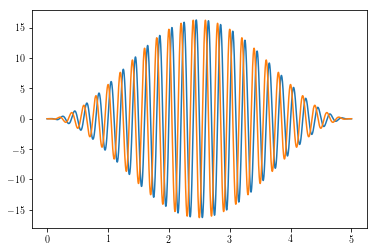

In [6]:
plt.plot(time.T,xw.T)

In [ ]:
x

In [ ]:
import numpy as np
import vibrationtesting as vt
import matplotlib.pyplot as plt
sample_freq = 1e3
tfinal = 5
fs = 100
A = 10
freq = 5
noise_power = 0.001 * sample_freq / 2
time = np.reshape(np.arange(0, tfinal, 1/sample_freq),(1,-1))
xsin = A*np.sin(2*np.pi*freq*time)
xcos = A*np.cos(2*np.pi*freq*time)
    # assembling individual records. vstack assembles channels
x=np.dstack((xsin,xcos)) # assembling individual records. vstack
xw=vt.hanning(x)*x

In [ ]:
vt.hanning(x[0,:,:])

In [ ]:
help(vt.hanning)

In [36]:
def slice(Matrix, a, b):
    '''slice a matrix properly- like Matlab'''
    return Matrix[a].T[b].T

In [6]:
M = np.random.randn(4,4)
a = [1, 3]
b = [2, 0]
M

array([[ 0.79632588, -1.4744288 , -0.64921021, -0.61019462],
       [ 0.33220674, -0.35174344, -1.34019153, -0.8097337 ],
       [ 0.17310565,  0.91467373,  1.66729138, -0.92529709],
       [-0.37017079,  0.35615109, -0.97547372, -1.9194807 ]])

In [25]:
%%timeit
M[np.array(a).reshape(-1,1) ,b]

5.56 µs ± 213 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [26]:
%%timeit
M[a].T[b].T

6.97 µs ± 242 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [28]:
%%timeit
vt.slice(M,a,b)

8.78 µs ± 137 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [20]:
help(vt.slice)

Help on function slice in module vibrationtesting.system:

slice(Matrix, a, b)
    slice a matrix properly- like Octave
    
    Addresses the confounding inconsistency that `M[a,b]` acts differently if
    `a` and `b` are the same length or different lengths.
    
    Parameters
    ----------
    Matrix : float array
        Arbitrary array
    a, b : int lists or arrays
        list of rows and columns to be selected from `Matrix`
    
    Returns
    -------
    Returns matrix



[autoreload of vibrationtesting.system failed: Traceback (most recent call last):
  File "/Users/jslater/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/Users/jslater/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/Users/jslater/anaconda3/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/jslater/anaconda3/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Us

In [30]:
Mred, Kred, T, master, truncated_dofs = vt.guyan(M, K)

NameError: name 'K' is not defined

In [7]:


A = np.array([[4, 0, 0],
            [0, 4, -1],
                   [0, -1, 4]])

B = np.array([[8, -4, 0],
                   [-4, 8, -4],
                   [0, -4, 4]])

In [9]:

C = A@B
C

array([[ 32, -16,   0],
       [-16,  36, -20],
       [  4, -24,  20]])

In [23]:
A

array([[ 4,  0,  0],
       [ 0,  4, -1],
       [ 0, -1,  4]])

In [24]:
B

array([[ 8, -4,  0],
       [-4,  8, -4],
       [ 0, -4,  4]])

In [25]:
C

array([[ 32, -16,   0],
       [-16,  36, -20],
       [  4, -24,  20]])

In [46]:
def rsolve(B, C):
    '''Solve right Gauss elimination equation
    
    Given :math:`A B  = C` return :math:`A = C B^{-1}`
    
    Parameters
    ----------
    B, C : float arrays
    
    Returns
    -------
    A : float array
    
    Examples
    --------
    >>> import numpy as np
    >>> B = np.array([[4, 0, 0],
    ...               [0, 4, -1],
    ...               [0, -1, 4]])
    >>> C = array([[ 32, -16,   0],
    ...            [-16,  36, -20],
    ...            [  4, -24,  20]])
    >>> A = vt.rsolve(B, C)
    >>> print(np.round(rsolve(B, C)))
    '''
    return la.solve(B.T, C.T).T
np.round(rsolve(B, C))

array([[ 4.,  0.,  0.],
       [-0.,  4., -1.],
       [ 0., -1.,  4.]])

In [43]:
np.set_printoptions(precision=2)
print(rsolve(B, C))

[[  4.00e+00   0.00e+00   0.00e+00]
 [ -6.66e-16   4.00e+00  -1.00e+00]
 [  0.00e+00  -1.00e+00   4.00e+00]]


In [45]:
np.round(rsolve(B, C))

array([[ 4.,  0.,  0.],
       [-0.,  4., -1.],
       [ 0., -1.,  4.]])

In [10]:
A

array([[ 4,  0,  0],
       [ 0,  4, -1],
       [ 0, -1,  4]])

In [11]:
B

array([[ 8, -4,  0],
       [-4,  8, -4],
       [ 0, -4,  4]])

In [12]:
C

array([[ 32, -16,   0],
       [-16,  36, -20],
       [  4, -24,  20]])

In [13]:
vt.rsolve(B, C)

array([[  4.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -6.66133815e-16,   4.00000000e+00,  -1.00000000e+00],
       [  0.00000000e+00,  -1.00000000e+00,   4.00000000e+00]])

In [85]:
np.sign(modes)

array([[-1.+0.j,  1.+0.j],
       [-1.+0.j, -1.+0.j],
       [ 1.+0.j, -1.+0.j]])

In [92]:
modes

array([[-0.00604609+0.28670057j,  0.00251064+0.46107979j,
        -0.29964299+0.00209841j],
       [-0.00086643-0.35763496j, -0.00544907+0.20516886j,
        -0.53994780+0.00080588j],
       [ 0.00150018+0.15917262j, -0.00146149-0.36967363j, -0.67330661+0.j        ]])

In [89]:
np.exp(np.angle(1+1j)*1j)

(0.70710678118654757+0.70710678118654746j)

In [93]:
modes@np.diag(np.exp(np.angle(modes[0,:])*-1j))

array([[ 0.28676431 +1.21430643e-17j,  0.46108663 -9.54097912e-18j,
         0.29965033 -1.82145965e-17j],
       [-0.35753719 +8.40655390e-03j,  0.20513615 +6.56614297e-03j,
         0.53994020 +2.97531465e-03j],
       [ 0.15910561 -4.85581278e-03j, -0.36967611 -5.51426224e-04j,
         0.67329010 +4.71506774e-03j]])